In [62]:
%load_ext autoreload
%autoreload 2
import os
import copy
import scipy

import numpy as np
import matplotlib.pyplot as plt

from astropy import wcs
from astropy.io import fits
from astropy.table import Table, Column, hstack
from astropy.stats import sigma_clip
import astropy.units as u
from astropy.coordinates import SkyCoord
from astropy.coordinates import match_coordinates_sky

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
from lvhuo.stack import Stack, StackSky, StackStar
from lvhuo.display import (display_single, display_multiple, \
                           draw_circles, draw_rectangles, SEG_CMAP)
from lvhuo.image import query_star, extract_obj

In [1]:
from pyraf import iraf

In [3]:
iraf.imshift('./Images/dr2_s18a_wide_129.6827_-0.0397_2.00arcmin_i.fits[1]', 
             './shift.fits', 30, 50, bound='constant', const=0.)

In [6]:
iraf.magnify('./Images/dr2_s18a_wide_129.6827_-0.0397_2.00arcmin_i.fits[1]', 
             './magnify.fits', 1.2, 1.2, interpo='poly3', bound='constant', const=0.)


./magnify.fits
  Magnify image ./Images/dr2_s18a_wide_129.6827_-0.0397_2.00arcmin_i.fits[1] to image ./magnify.fits.
  Interpolation is poly3.
  Boundary extension is constant.
  Boundary pixel constant is 0..
  Output coordinates in terms of input coordinates:
    x1 =         1., x2 =      1430., dx =   0.833333
    y1 =         1., y2 =      1429., dy =   0.833333


In [84]:
hdu = fits.open('./Images/dr2_s18a_wide_129.6827_-0.0397_2.00arcmin_i.fits')
simg = Stack(hdu[1].data, header=hdu[1].header)

In [85]:
import galsim

In [86]:
hdu[1].header['CD1_2'] = 0.0
hdu[1].header['CD2_1'] = 0.0

In [87]:
galimg = galsim.Image(simg.image)
galimg.wcs = galsim.GSFitsWCS(header=hdu[1].header)

In [94]:
galimg.bounds

galsim.BoundsI(xmin=1, xmax=1430, ymin=1, ymax=1429)

In [95]:
galimg.resize(galsim.BoundsI(xmin=1, xmax=600, ymin=1, ymax=600))

In [97]:
galimg.wcs

galsim.GSFitsWCS(_data = ['TAN', array([-14016.0, -14374.0]), array([[-4.6666666666636e-05, 0.0], [0.0, 4.66666666666368e-05]]), coord.CelestialCoord(coord.Angle(2.275392210007416, coord.radians), coord.Angle(-0.012981787824751123, coord.radians)), None, None, None])

In [100]:
simg.wcs

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 130.37037037037  -0.743801652892557  
CRPIX : -14016.0  -14374.0  
CD1_1 CD1_2  : -4.6666666666636e-05  0.0  
CD2_1 CD2_2  : 0.0  4.66666666666368e-05  
NAXIS : 1430  1429

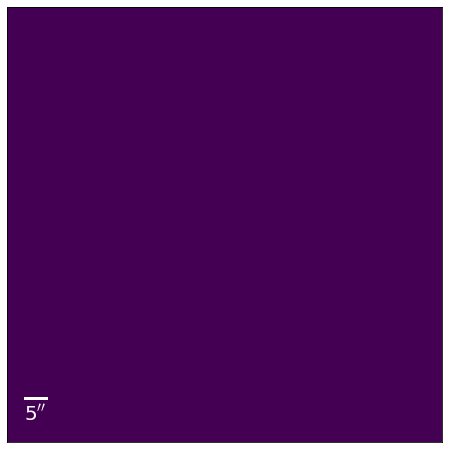

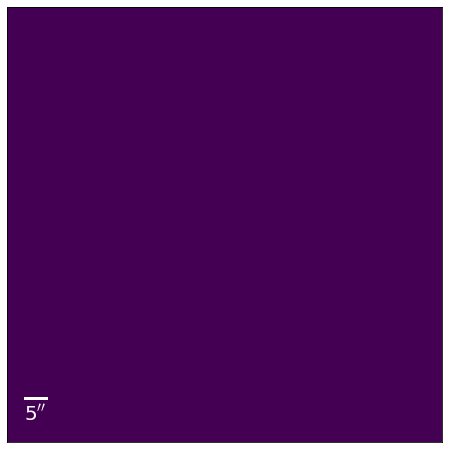

In [102]:
display_single(galimg.array)

In [67]:
hdr = {}
galimg.wcs.writeToFitsHeader(hdr, galimg.bounds)

In [68]:
hdr

{'GS_XMIN': (31, 'GalSim image minimum x coordinate'),
 'GS_YMIN': (51, 'GalSim image minimum y coordinate'),
 'GS_WCS': ('GSFitsWCS', 'GalSim WCS name'),
 'CTYPE1': 'RA---TAN',
 'CTYPE2': 'DEC--TAN',
 'CRPIX1': -14016.0,
 'CRPIX2': -14374.0,
 'CD1_1': -4.6666666666636e-05,
 'CD1_2': 0.0,
 'CD2_1': 0.0,
 'CD2_2': 4.66666666666368e-05,
 'CUNIT1': 'deg',
 'CUNIT2': 'deg',
 'CRVAL1': 130.37037037037,
 'CRVAL2': -0.743801652892557}

In [69]:
wcs.WCS(hdr)

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 130.37037037037  -0.743801652892557  
CRPIX : -14016.0  -14374.0  
CD1_1 CD1_2  : -4.6666666666636e-05  0.0  
CD2_1 CD2_2  : 0.0  4.66666666666368e-05  
NAXIS : 0  0

In [34]:
galsim.GSFitsWCS(header=hdu[1].header)

galsim.GSFitsWCS(_data = ['TAN', array([-14016.0, -14374.0]), array([[-4.6666666666636e-05, 0.0], [0.0, 4.66666666666368e-05]]), coord.CelestialCoord(coord.Angle(2.275392210007416, coord.radians), coord.Angle(-0.012981787824751123, coord.radians)), None, None, None])

galsim.BoundsI(xmin=31, xmax=1460, ymin=51, ymax=1479)

In [38]:
galimg.wcs.writeToFitsHeader(simg.header, galimg.bounds)

In [39]:
simg.header

XTENSION= 'IMAGE   '           / Image extension                                
BITPIX  =                  -32 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 1430                                                  
NAXIS2  =                 1429                                                  
PCOUNT  =                    0 / number of parameters                           
GCOUNT  =                    1 / number of groups                               
WCSAXES =                    2 / Number of WCS axes                             
CRPIX1  =             -14016.0 / Reference pixel on axis 1                      
CRPIX2  =             -14374.0 / Reference pixel on axis 2                      
CRVAL1  =      130.37037037037 / Value at ref. pixel on axis 1                  
CRVAL2  =   -0.743801652892557 / Value at ref. pixel on axis 2                  
CTYPE1  = 'RA---TAN'        